In [1]:
#Import the needed Libraries
import pandas as pd
import numpy as np
from scipy.linalg import eigh
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [2]:
data_iris = pd.read_csv("Iris_Updated.csv")

In [3]:
data_iris.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data_iris = data_iris[["PetalWidthCm", "SepalLengthCm","Species"]]

In [5]:
data_iris['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    44
Iris-virginica     44
Name: Species, dtype: int64

In [6]:
data_iris_balanced = data_iris[data_iris['Species'] != 'Iris-setosa']

In [7]:
data_iris_balanced['Species'].value_counts()

Iris-versicolor    44
Iris-virginica     44
Name: Species, dtype: int64

# 44:44

<ipython-input-8-2f34ddc11fd2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_iris_balanced['Species'] = le.fit_transform(data_iris_balanced['Species'])


Accuracy: 1.00


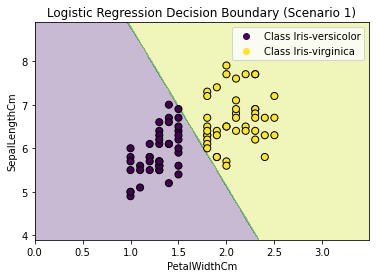

In [8]:
# Encode the species column to numerical values
le = LabelEncoder()
data_iris_balanced['Species'] = le.fit_transform(data_iris_balanced['Species'])

# Selecting only the required columns
X = data_iris_balanced[["PetalWidthCm", "SepalLengthCm"]]
y = data_iris_balanced['Species']

# Rename the dataset to data_iris_balanced
data_iris_balanced = pd.concat([X, y], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Plot the decision boundary with a legend
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)

# Create a scatter plot with labels for each class
scatter = plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolors='k', marker='o', s=50, linewidth=1)

# Add legend
legend_labels = le.classes_
plt.legend(handles=scatter.legend_elements()[0], labels=[f"Class {label}" for label in legend_labels])

plt.title("Logistic Regression Decision Boundary (Scenario 1)")
plt.xlabel("PetalWidthCm")
plt.ylabel("SepalLengthCm")
plt.show()

# 21:44

In [9]:
data_iris_imbalanced_5 = data_iris_balanced[~((data_iris['Species'] == 'Iris-versicolor') & (data_iris['PetalWidthCm'] < 1.25))]

<ipython-input-9-147d8b65d2ad>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_iris_imbalanced_5 = data_iris_balanced[~((data_iris['Species'] == 'Iris-versicolor') & (data_iris['PetalWidthCm'] < 1.25))]


In [10]:
data_iris_imbalanced_5 = data_iris_imbalanced_5[~((data_iris['Species'] == 'Iris-versicolor') & (data_iris['SepalLengthCm'] < 5.7))]

<ipython-input-10-0b0bdf5cbc0d>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_iris_imbalanced_5 = data_iris_imbalanced_5[~((data_iris['Species'] == 'Iris-versicolor') & (data_iris['SepalLengthCm'] < 5.7))]


In [11]:
data_iris_imbalanced_5['Species'].value_counts()

1    44
0    21
Name: Species, dtype: int64

Accuracy: 1.00


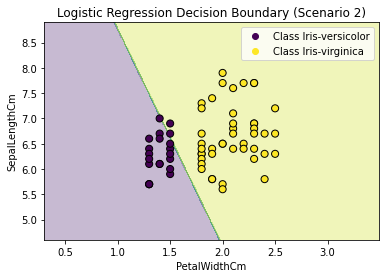

In [12]:
# Encode the species column to numerical values
le = LabelEncoder()
data_iris_imbalanced_5['Species'] = le.fit_transform(data_iris_imbalanced_5['Species'])

# Selecting only the required columns
X = data_iris_imbalanced_5[["PetalWidthCm", "SepalLengthCm"]]
y = data_iris_imbalanced_5['Species']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Plot the decision boundary with a legend
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)

# Create a scatter plot with labels for each class
scatter = plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolors='k', marker='o', s=50, linewidth=1)

# Add legend
plt.legend(handles=scatter.legend_elements()[0], labels=[f"Class {label}" for label in legend_labels])

plt.title("Logistic Regression Decision Boundary (Scenario 2)")
plt.xlabel("PetalWidthCm")
plt.ylabel("SepalLengthCm")
plt.show()

# 15:44

In [13]:
data_iris_imbalanced_15 = data_iris_balanced[~((data_iris['Species'] == 'Iris-versicolor') & (data_iris['PetalWidthCm'] < 1.4))]

<ipython-input-13-097e7db93fe1>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_iris_imbalanced_15 = data_iris_balanced[~((data_iris['Species'] == 'Iris-versicolor') & (data_iris['PetalWidthCm'] < 1.4))]


In [14]:
data_iris_imbalanced_15 = data_iris_imbalanced_15[~((data_iris['Species'] == 'Iris-versicolor') & (data_iris['SepalLengthCm'] < 5.3))]

<ipython-input-14-14cf38599831>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_iris_imbalanced_15 = data_iris_imbalanced_15[~((data_iris['Species'] == 'Iris-versicolor') & (data_iris['SepalLengthCm'] < 5.3))]


In [15]:
data_iris_imbalanced_15['Species'].value_counts()

1    44
0    15
Name: Species, dtype: int64

Accuracy: 0.75


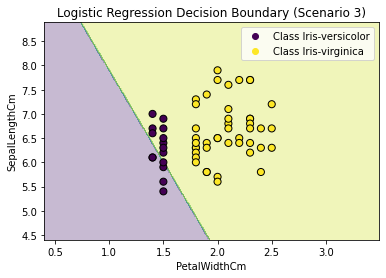

In [16]:
# Encode the species column to numerical values
le = LabelEncoder()
data_iris_imbalanced_15['Species'] = le.fit_transform(data_iris_imbalanced_15['Species'])

# Selecting only the required columns
X = data_iris_imbalanced_15[["PetalWidthCm", "SepalLengthCm"]]
y = data_iris_imbalanced_15['Species']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Plot the decision boundary with a legend
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)

# Create a scatter plot with labels for each class
scatter = plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolors='k', marker='o', s=50, linewidth=1)

# Add legend
plt.legend(handles=scatter.legend_elements()[0], labels=[f"Class {label}" for label in legend_labels])

plt.title("Logistic Regression Decision Boundary (Scenario 3)")
plt.xlabel("PetalWidthCm")
plt.ylabel("SepalLengthCm")
plt.show()

# 10:44

In [17]:
data_iris_imbalanced_10 = data_iris_balanced[~((data_iris['Species'] == 'Iris-versicolor') & (data_iris['PetalWidthCm'] < 1.5))]

<ipython-input-17-315ba868f4e3>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_iris_imbalanced_10 = data_iris_balanced[~((data_iris['Species'] == 'Iris-versicolor') & (data_iris['PetalWidthCm'] < 1.5))]


In [18]:
data_iris_imbalanced_10['Species'].value_counts()

1    44
0    10
Name: Species, dtype: int64

<ipython-input-19-8e70f8385a06>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_iris_imbalanced_10['Species'] = le.fit_transform(data_iris_imbalanced_10['Species'])


Accuracy: 0.82


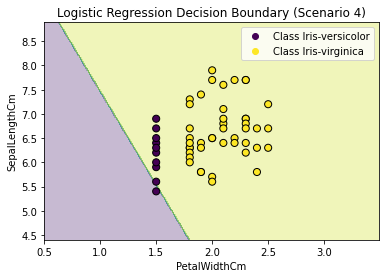

In [19]:
# Encode the species column to numerical values
le = LabelEncoder()
data_iris_imbalanced_10['Species'] = le.fit_transform(data_iris_imbalanced_10['Species'])

# Selecting only the required columns
X = data_iris_imbalanced_10[["PetalWidthCm", "SepalLengthCm"]]
y = data_iris_imbalanced_10['Species']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Plot the decision boundary with a legend
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)

# Create a scatter plot with labels for each class
scatter = plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolors='k', marker='o', s=50, linewidth=1)

# Add legend
plt.legend(handles=scatter.legend_elements()[0], labels=[f"Class {label}" for label in legend_labels])

plt.title("Logistic Regression Decision Boundary (Scenario 4)")
plt.xlabel("PetalWidthCm")
plt.ylabel("SepalLengthCm")
plt.show()

# 4:44

In [20]:
data_iris_imbalanced_5 = data_iris_balanced[~((data_iris['Species'] == 'Iris-versicolor') & (data_iris['PetalWidthCm'] < 1.5))]

<ipython-input-20-81cfc292ec6b>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_iris_imbalanced_5 = data_iris_balanced[~((data_iris['Species'] == 'Iris-versicolor') & (data_iris['PetalWidthCm'] < 1.5))]


In [21]:
data_iris_imbalanced_5 = data_iris_imbalanced_5[~((data_iris['Species'] == 'Iris-versicolor') & (data_iris['SepalLengthCm'] < 6.4))]

<ipython-input-21-5ec2d1e7d3bd>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_iris_imbalanced_5 = data_iris_imbalanced_5[~((data_iris['Species'] == 'Iris-versicolor') & (data_iris['SepalLengthCm'] < 6.4))]


In [22]:
data_iris_imbalanced_5['Species'].value_counts()

1    44
0     4
Name: Species, dtype: int64

Accuracy: 1.00


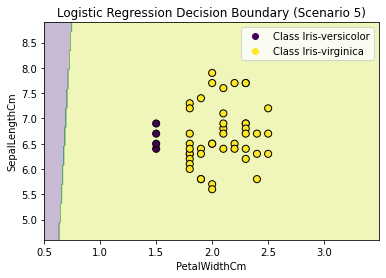

In [23]:
# Encode the species column to numerical values
le = LabelEncoder()
data_iris_imbalanced_5['Species'] = le.fit_transform(data_iris_imbalanced_5['Species'])

# Selecting only the required columns
X = data_iris_imbalanced_5[["PetalWidthCm", "SepalLengthCm"]]
y = data_iris_imbalanced_5['Species']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Plot the decision boundary with a legend
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)

# Create a scatter plot with labels for each class
scatter = plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolors='k', marker='o', s=50, linewidth=1)

# Add legend
plt.legend(handles=scatter.legend_elements()[0], labels=[f"Class {label}" for label in legend_labels])

plt.title("Logistic Regression Decision Boundary (Scenario 5)")
plt.xlabel("PetalWidthCm")
plt.ylabel("SepalLengthCm")
plt.show()

In [24]:
data_iris_imbalanced_C1 = data_iris_balanced[~((data_iris['Species'] == 'Iris-versicolor') & (data_iris['PetalWidthCm'] < 1.5))]

<ipython-input-24-d6cd709d449d>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_iris_imbalanced_C1 = data_iris_balanced[~((data_iris['Species'] == 'Iris-versicolor') & (data_iris['PetalWidthCm'] < 1.5))]


In [25]:
data_iris_imbalanced_C1 = data_iris_imbalanced_C1[~((data_iris['Species'] == 'Iris-virginica') & (data_iris['PetalWidthCm'] > 1.8))]

<ipython-input-25-d41a63cb8cda>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_iris_imbalanced_C1 = data_iris_imbalanced_C1[~((data_iris['Species'] == 'Iris-virginica') & (data_iris['PetalWidthCm'] > 1.8))]


In [26]:
data_iris_imbalanced_C1 = data_iris_imbalanced_C1[~((data_iris['Species'] == 'Iris-versicolor') & (data_iris['SepalLengthCm'] <= 6.0))]

<ipython-input-26-e3b58c55c8bc>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_iris_imbalanced_C1 = data_iris_imbalanced_C1[~((data_iris['Species'] == 'Iris-versicolor') & (data_iris['SepalLengthCm'] <= 6.0))]


In [27]:
data_iris_imbalanced_C1 = data_iris_imbalanced_C1[~((data_iris['Species'] == 'Iris-versicolor') & (data_iris['SepalLengthCm'] >= 6.4))]

<ipython-input-27-27e67f224da2>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_iris_imbalanced_C1 = data_iris_imbalanced_C1[~((data_iris['Species'] == 'Iris-versicolor') & (data_iris['SepalLengthCm'] >= 6.4))]


In [28]:
data_iris_imbalanced_C1 = data_iris_imbalanced_C1[~((data_iris['Species'] == 'Iris-virginica') & (data_iris['SepalLengthCm'] > 7.0))]

<ipython-input-28-11c05a33bd01>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_iris_imbalanced_C1 = data_iris_imbalanced_C1[~((data_iris['Species'] == 'Iris-virginica') & (data_iris['SepalLengthCm'] > 7.0))]


In [29]:
data_iris_imbalanced_C1 = data_iris_imbalanced_C1[~((data_iris['Species'] == 'Iris-virginica') & (data_iris['SepalLengthCm'] < 6.0))]

<ipython-input-29-aac7a84b23bb>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_iris_imbalanced_C1 = data_iris_imbalanced_C1[~((data_iris['Species'] == 'Iris-virginica') & (data_iris['SepalLengthCm'] < 6.0))]


In [30]:
data_iris_imbalanced_C1['Species'].value_counts()

1    8
0    2
Name: Species, dtype: int64

In [31]:
data_iris_imbalanced_C1.head(5)

,PetalWidthCm,SepalLengthCm,Species
67,1.5,6.2,0
70,1.5,6.3,0
97,1.8,6.3,1
101,1.8,6.7,1
109,1.8,6.5,1


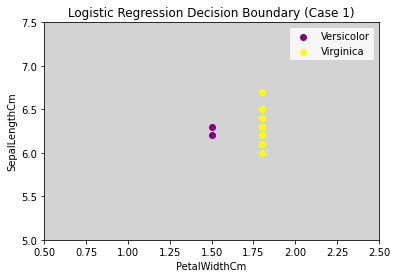

In [32]:
import matplotlib.pyplot as plt

# Separate the data based on species
versicolor = data_iris_imbalanced_C1[data_iris_imbalanced_C1['Species'] == 0]
virginica = data_iris_imbalanced_C1[data_iris_imbalanced_C1['Species'] == 1]

# Plotting
plt.scatter(versicolor["PetalWidthCm"], versicolor["SepalLengthCm"], color='purple', label='Versicolor')
plt.scatter(virginica["PetalWidthCm"], virginica["SepalLengthCm"], color='yellow', label='Virginica')

# Set background color to grey
plt.gca().set_facecolor('lightgrey')

# Set axis limits
plt.xlim(0.5, 2.5)
plt.ylim(5.0, 7.5)

# Set axis labels
plt.xlabel("PetalWidthCm")
plt.ylabel("SepalLengthCm")

# Add legend
plt.legend()

# Show the plot
plt.title("Logistic Regression Decision Boundary (Case 1)")
plt.show()


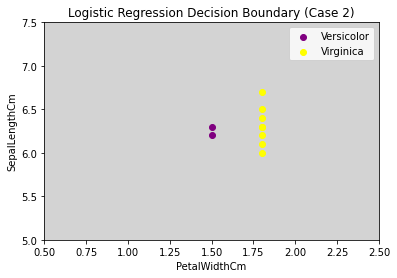

In [33]:
import matplotlib.pyplot as plt

# Separate the data based on species
versicolor = data_iris_imbalanced_C1[data_iris_imbalanced_C1['Species'] == 0]
virginica = data_iris_imbalanced_C1[data_iris_imbalanced_C1['Species'] == 1]

# Plotting
plt.scatter(versicolor["PetalWidthCm"], versicolor["SepalLengthCm"], color='purple', label='Versicolor')
plt.scatter(virginica["PetalWidthCm"], virginica["SepalLengthCm"], color='yellow', label='Virginica')

# Set background color to grey
plt.gca().set_facecolor('lightgrey')

# Set axis limits
plt.xlim(0.5, 2.5)
plt.ylim(5.0, 7.5)

# Set axis labels
plt.xlabel("PetalWidthCm")
plt.ylabel("SepalLengthCm")

# Add legend
plt.legend()

# Show the plot
plt.title("Logistic Regression Decision Boundary (Case 2)")
plt.show()

In [34]:
data_iris_imbalanced_C3 = data_iris_balanced[~((data_iris['Species'] == 'Iris-versicolor') & (data_iris['PetalWidthCm'] < 1.5))]

<ipython-input-34-d8c7b174c611>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_iris_imbalanced_C3 = data_iris_balanced[~((data_iris['Species'] == 'Iris-versicolor') & (data_iris['PetalWidthCm'] < 1.5))]


In [35]:
data_iris_imbalanced_C3 = data_iris_imbalanced_C3[~((data_iris['Species'] == 'Iris-virginica') & (data_iris['PetalWidthCm'] > 1.8))]

<ipython-input-35-1e51304e83eb>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_iris_imbalanced_C3 = data_iris_imbalanced_C3[~((data_iris['Species'] == 'Iris-virginica') & (data_iris['PetalWidthCm'] > 1.8))]


In [36]:
data_iris_imbalanced_C3 = data_iris_imbalanced_C3[~((data_iris['Species'] == 'Iris-versicolor') & (data_iris['SepalLengthCm'] <= 5.6))]

<ipython-input-36-547245db56df>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_iris_imbalanced_C3 = data_iris_imbalanced_C3[~((data_iris['Species'] == 'Iris-versicolor') & (data_iris['SepalLengthCm'] <= 5.6))]


In [37]:
data_iris_imbalanced_C3 = data_iris_imbalanced_C3[~((data_iris['Species'] == 'Iris-versicolor') & (data_iris['SepalLengthCm'] >= 6.8))]

<ipython-input-37-40fe9474116d>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_iris_imbalanced_C3 = data_iris_imbalanced_C3[~((data_iris['Species'] == 'Iris-versicolor') & (data_iris['SepalLengthCm'] >= 6.8))]


In [38]:
data_iris_imbalanced_C3 = data_iris_imbalanced_C3[~((data_iris['Species'] == 'Iris-virginica') & (data_iris['SepalLengthCm'] > 7.0))]

<ipython-input-38-7ba52f472b38>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_iris_imbalanced_C3 = data_iris_imbalanced_C3[~((data_iris['Species'] == 'Iris-virginica') & (data_iris['SepalLengthCm'] > 7.0))]


In [39]:
data_iris_imbalanced_C3 = data_iris_imbalanced_C3[~((data_iris['Species'] == 'Iris-virginica') & (data_iris['SepalLengthCm'] < 6.0))]

<ipython-input-39-9d7f76983dc8>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_iris_imbalanced_C3 = data_iris_imbalanced_C3[~((data_iris['Species'] == 'Iris-virginica') & (data_iris['SepalLengthCm'] < 6.0))]


In [40]:
data_iris_imbalanced_C3['Species'].value_counts()

1    8
0    7
Name: Species, dtype: int64

Accuracy: 1.00


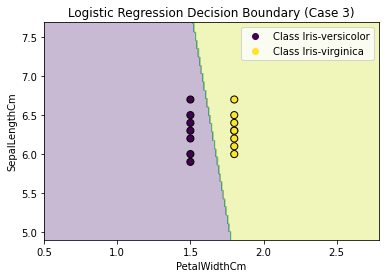

In [41]:
# Encode the species column to numerical values
le = LabelEncoder()
data_iris_imbalanced_C3['Species'] = le.fit_transform(data_iris_imbalanced_C3['Species'])

# Selecting only the required columns
X = data_iris_imbalanced_C3[["PetalWidthCm", "SepalLengthCm"]]
y = data_iris_imbalanced_C3['Species']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Plot the decision boundary with a legend
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)

# Create a scatter plot with labels for each class
scatter = plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolors='k', marker='o', s=50, linewidth=1)

# Add legend
plt.legend(handles=scatter.legend_elements()[0], labels=[f"Class {label}" for label in legend_labels])

plt.title("Logistic Regression Decision Boundary (Case 3)")
plt.xlabel("PetalWidthCm")
plt.ylabel("SepalLengthCm")
plt.show()

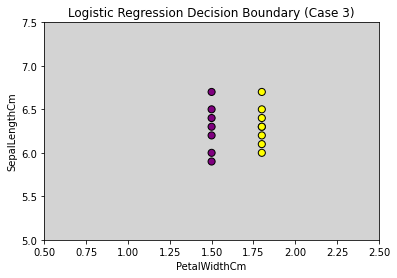

In [42]:
from matplotlib.colors import ListedColormap

# Plot the data points with different colors for each class
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=ListedColormap(['purple', 'yellow']), edgecolors='k', marker='o', s=50, linewidth=1)

# Set background color to grey
plt.gca().set_facecolor('lightgrey')

# Set axis limits
plt.xlim(0.5, 2.5)
plt.ylim(5.0, 7.5)

plt.title("Logistic Regression Decision Boundary (Case 3)")
plt.xlabel("PetalWidthCm")
plt.ylabel("SepalLengthCm")
plt.show()
